In [1]:
import pandas as pd

# Load data
sentiment_df = pd.read_csv('/content/fear_greed_index.csv')
trader_df = pd.read_csv('/content/historical_data.csv')

# View the first few rows
print(sentiment_df.head())
print(trader_df.head())


    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50 

In [2]:
# Check info
sentiment_df.info()
trader_df.info()

# Check missing values
print(sentiment_df.isnull().sum())
print(trader_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-nu

In [7]:
# Convert sentiment date column
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')
sentiment_df['date'] = sentiment_df['date'].dt.date  # Convert to just date

# Convert trader timestamp column
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')
trader_df['date'] = trader_df['Timestamp IST'].dt.date  # New column with just the date


In [8]:
merged_df = pd.merge(trader_df, sentiment_df, on='date', how='left')
merged_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed


In [12]:
merged_df.info()
merged_df.head()
merged_df['classification'].value_counts()  # Fear vs Greed count


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


In [16]:
merged_df.columns = merged_df.columns.str.lower()


In [17]:
merged_df['classification'].value_counts()


,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400


In [21]:
import os

# Create outputs and csv_files folders if they don't exist
os.makedirs('outputs', exist_ok=True)
os.makedirs('csv_files', exist_ok=True)


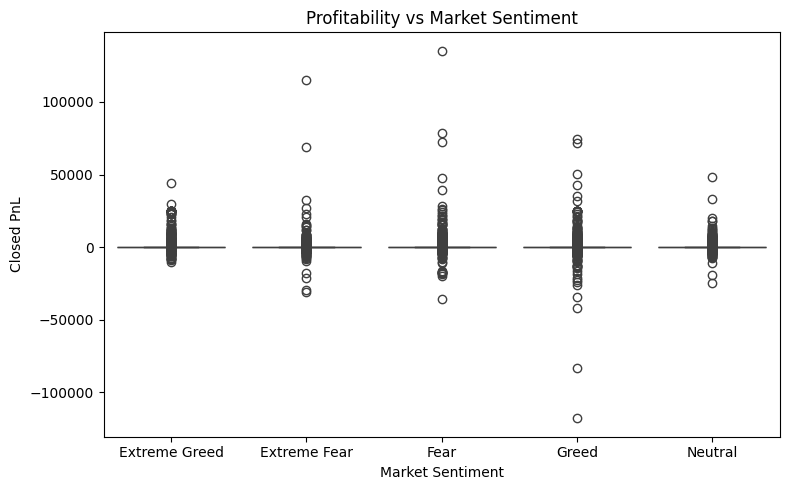

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='classification', y='closed pnl')
plt.title("Profitability vs Market Sentiment")
plt.ylabel("Closed PnL")
plt.xlabel("Market Sentiment")
plt.tight_layout()
plt.savefig('/content/outputs/pnl_vs_sentiment.png')
plt.show()


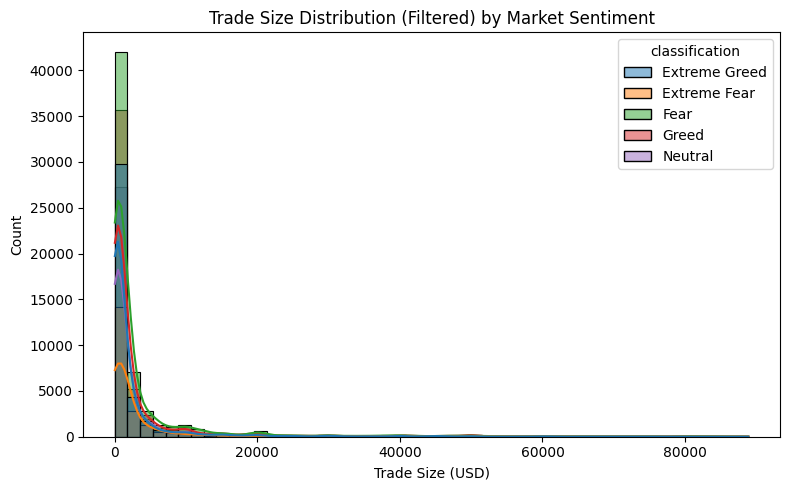

In [25]:
# Optionally filter out top 1% of trade sizes
threshold = merged_df['size usd'].quantile(0.99)
filtered_df = merged_df[merged_df['size usd'] < threshold]

plt.figure(figsize=(8, 5))
sns.histplot(data=filtered_df, x='size usd', hue='classification', bins=50, kde=True)
plt.title("Trade Size Distribution (Filtered) by Market Sentiment")
plt.xlabel("Trade Size (USD)")
plt.tight_layout()
plt.savefig('outputs/trade_size_filtered_dist.png')
plt.show()


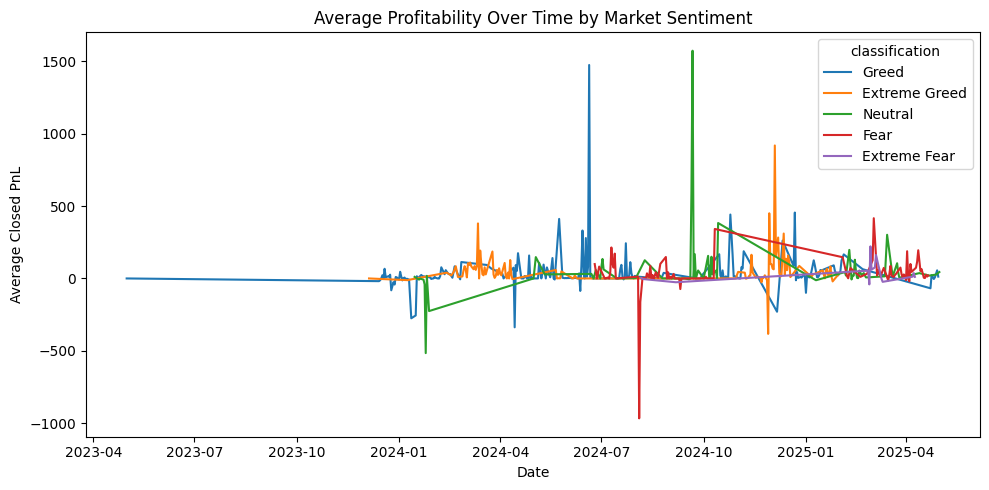

In [27]:
# Convert `date` column back to datetime for time series
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Calculate average PnL over time per sentiment
avg_pnl = merged_df.groupby(['date', 'classification'])['closed pnl'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_pnl, x='date', y='closed pnl', hue='classification')
plt.title("Average Profitability Over Time by Market Sentiment")
plt.xlabel("Date")
plt.ylabel("Average Closed PnL")
plt.tight_layout()
plt.savefig('/content/outputs/avg_pnl_over_time.png')
plt.show()


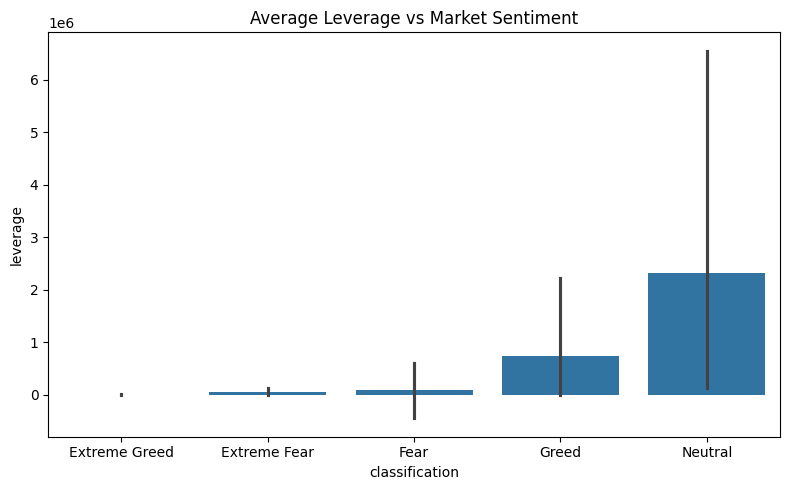

In [29]:
# Optional: Create leverage column if not present
merged_df['leverage'] = merged_df['size usd'] / merged_df['start position']

plt.figure(figsize=(8, 5))
sns.barplot(data=merged_df, x='classification', y='leverage')
plt.title("Average Leverage vs Market Sentiment")
plt.tight_layout()
plt.savefig('outputs/leverage_vs_sentiment.png')
plt.show()


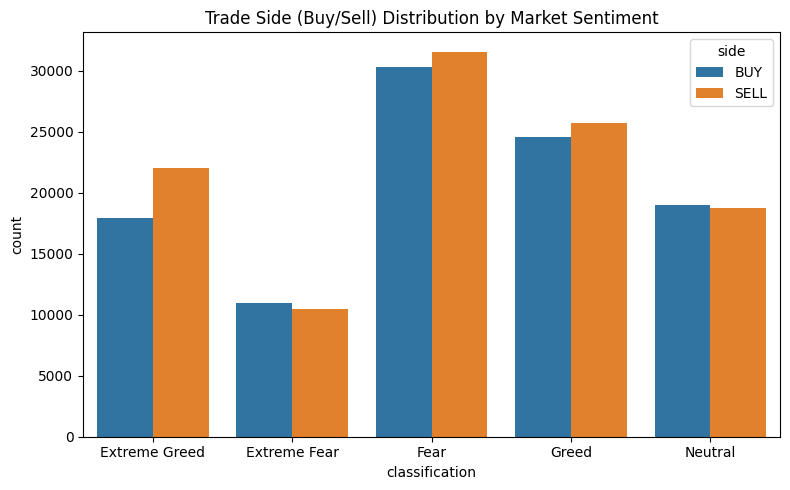

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x='classification', hue='side')
plt.title("Trade Side (Buy/Sell) Distribution by Market Sentiment")
plt.tight_layout()
plt.savefig('outputs/side_vs_sentiment.png')
plt.show()


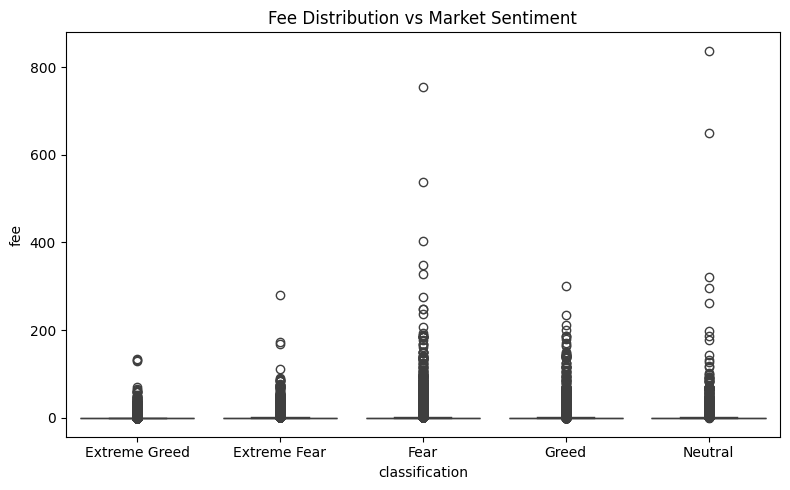

In [33]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='classification', y='fee')
plt.title("Fee Distribution vs Market Sentiment")
plt.tight_layout()
plt.savefig('outputs/fee_vs_sentiment.png')
plt.show()
